In [1]:
pip install pandas

In [2]:
file1 = "male.txt"
file2 = "female.txt"
output = "names.txt"

with open(file1, "r") as f1, open(file2, "r") as f2:
    data1 = f1.read()
    data2 = f2.read()

with open(output, "w") as out:
    out.write(data1 + "\n" + data2)

print("Files merged successfully!")


Files merged successfully!


In [3]:

words = open('names.txt', 'r').read().splitlines()

In [4]:
words[:10]

['Aamir',
 'Aaron',
 'Abbey',
 'Abbie',
 'Abbot',
 'Abbott',
 'Abby',
 'Abdel',
 'Abdul',
 'Abdulkarim']

In [5]:
words =[w.lower()for w in words]

In [6]:
import string

In [7]:
remove=string.punctuation

In [8]:
def remove_punc(text):
    return text.translate(str.maketrans('','',remove))

In [9]:
words =[remove_punc(w)for w in words]

In [10]:
words = [w.replace(" ", "") for w in words]


In [11]:
len(words)

7945

In [12]:
min(len(w) for w in words)

0

In [13]:
max(len(w) for w in words)

14

# Bigram Language Model

In [14]:
for w in words[:1]:
    for ch1,ch2 in zip(w,w[1:]):
        print(ch1,ch2)

a a
a m
m i
i r


In [15]:
w

'aamir'

In [16]:
list(w)

['a', 'a', 'm', 'i', 'r']

In [17]:
for w in words[:1]:
    chs=['<S>']+list(w)+['<E>']
    for ch1,ch2 in zip(chs,chs[1:]):
        print(ch1,ch2)

<S> a
a a
a m
m i
i r
r <E>


In [18]:
b={}
for w in words[:3]:
    chs=['<S>']+list(w)+['<E>']
    
    for ch1,ch2 in zip(chs,chs[1:]):
        bigram=(ch1,ch2)#bigram is a list that has consecutive chars
        b[bigram]=b.get(bigram,0)+1
        print(ch1,ch2)

<S> a
a a
a m
m i
i r
r <E>
<S> a
a a
a r
r o
o n
n <E>
<S> a
a b
b b
b e
e y
y <E>


In [19]:
b

{('<S>', 'a'): 3,
 ('a', 'a'): 2,
 ('a', 'm'): 1,
 ('m', 'i'): 1,
 ('i', 'r'): 1,
 ('r', '<E>'): 1,
 ('a', 'r'): 1,
 ('r', 'o'): 1,
 ('o', 'n'): 1,
 ('n', '<E>'): 1,
 ('a', 'b'): 1,
 ('b', 'b'): 1,
 ('b', 'e'): 1,
 ('e', 'y'): 1,
 ('y', '<E>'): 1}

In [20]:
b={}
for w in words[:]:
    chs=['<S>']+list(w)+['<E>']
    
    for ch1,ch2 in zip(chs,chs[1:]):
        bigram=(ch1,ch2)#bigram is a list that has consecutive chars
        b[bigram]=b.get(bigram,0)+1
        

In [21]:
b

{('<S>', 'a'): 656,
 ('a', 'a'): 14,
 ('a', 'm'): 204,
 ('m', 'i'): 235,
 ('i', 'r'): 113,
 ('r', '<E>'): 237,
 ('a', 'r'): 950,
 ('r', 'o'): 318,
 ('o', 'n'): 462,
 ('n', '<E>'): 864,
 ('a', 'b'): 143,
 ('b', 'b'): 58,
 ('b', 'e'): 316,
 ('e', 'y'): 203,
 ('y', '<E>'): 793,
 ('b', 'i'): 111,
 ('i', 'e'): 700,
 ('e', '<E>'): 1901,
 ('b', 'o'): 48,
 ('o', 't'): 74,
 ('t', '<E>'): 232,
 ('t', 't'): 277,
 ('b', 'y'): 48,
 ('b', 'd'): 4,
 ('d', 'e'): 320,
 ('e', 'l'): 880,
 ('l', '<E>'): 366,
 ('d', 'u'): 35,
 ('u', 'l'): 103,
 ('l', 'k'): 9,
 ('k', 'a'): 210,
 ('r', 'i'): 813,
 ('i', 'm'): 82,
 ('m', '<E>'): 83,
 ('l', 'l'): 552,
 ('l', 'a'): 505,
 ('a', 'h'): 103,
 ('h', '<E>'): 198,
 ('r', 'd'): 149,
 ('d', '<E>'): 267,
 ('b', 'n'): 2,
 ('n', 'e'): 708,
 ('e', 'r'): 733,
 ('b', 'r'): 144,
 ('r', 'a'): 487,
 ('h', 'a'): 414,
 ('a', 'c'): 122,
 ('c', 'e'): 192,
 ('a', 'd'): 186,
 ('d', 'a'): 338,
 ('a', 'i'): 158,
 ('m', 's'): 5,
 ('s', '<E>'): 323,
 ('d', 'd'): 62,
 ('d', 'i'): 244,
 ('d

In [22]:
sorted(b.items(),key = lambda kv : -kv[1] )

[(('e', '<E>'), 1901),
 (('a', '<E>'), 1802),
 (('a', 'n'), 1044),
 (('a', 'r'), 950),
 (('e', 'l'), 880),
 (('n', '<E>'), 864),
 (('r', 'i'), 813),
 (('i', 'n'), 798),
 (('y', '<E>'), 793),
 (('e', 'r'), 733),
 (('n', 'e'), 708),
 (('i', 'e'), 700),
 (('l', 'e'), 698),
 (('<S>', 'm'), 684),
 (('l', 'i'), 676),
 (('<S>', 'a'), 656),
 (('<S>', 'c'), 635),
 (('n', 'a'), 633),
 (('e', 'n'), 588),
 (('l', 'l'), 552),
 (('<S>', 's'), 547),
 (('o', 'r'), 528),
 (('m', 'a'), 524),
 (('a', 'l'), 519),
 (('l', 'a'), 505),
 (('r', 'e'), 490),
 (('r', 'a'), 487),
 (('n', 'n'), 477),
 (('o', 'n'), 462),
 (('<S>', 'd'), 454),
 (('<S>', 'r'), 447),
 (('<S>', 'l'), 445),
 (('<S>', 'j'), 437),
 (('i', 'a'), 422),
 (('<S>', 'b'), 419),
 (('h', 'a'), 414),
 (('i', 'l'), 411),
 (('t', 'a'), 393),
 (('<S>', 't'), 386),
 (('<S>', 'e'), 370),
 (('<S>', 'g'), 369),
 (('i', '<E>'), 367),
 (('l', '<E>'), 366),
 (('i', 's'), 366),
 (('h', 'e'), 364),
 (('n', 'i'), 364),
 (('e', 't'), 347),
 (('<S>', 'k'), 346),

In [23]:
import torch

In [24]:
# 26 alphabets+ 2 start and ending token
N=torch.zeros((28,28),dtype=torch.int32)


In [25]:
#a charcter array so we can mark each character with a number to convert into a tensor

chars = sorted(list(set(''.join(words))))
stoi ={s:i for i,s in enumerate(chars) }
stoi['<S>']=26
stoi['<E>']=27

In [26]:
stoi

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25,
 '<S>': 26,
 '<E>': 27}

In [27]:
for w in words[:]:
    chs=['<S>']+list(w)+['<E>']
    
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        
        N[ix1,ix2]+=1

In [28]:
N

tensor([[  14,  143,  122,  186,   41,   20,   55,  103,  158,    9,   23,  519,
          204, 1044,    7,   17,    8,  950,  161,  225,  157,   78,   24,   19,
          127,   17,    0, 1802],
        [ 132,   58,    0,    4,  316,    0,    0,    3,  111,    2,    0,   30,
            0,    2,   48,    0,    0,  144,    2,    0,   26,    0,    0,    0,
           48,    0,    0,   30],
        [ 256,    0,    7,    1,  192,    0,    0,  269,  125,    0,  100,   90,
            0,    0,  165,    0,   11,   26,    0,    8,    9,    0,    0,    0,
           41,    1,    0,   25],
        [ 338,    0,    1,   62,  320,    6,   13,    3,  244,    0,    0,   10,
            7,    9,  201,    0,    0,  121,   15,    1,   35,    2,   15,    0,
           90,    0,    0,  267],
        [ 178,   63,   39,  157,  214,   30,   43,    9,   76,    7,   19,  880,
          133,  588,   83,   35,    0,  733,  208,  347,   30,   93,   31,   16,
          203,   11,    0, 1901],
        [  69,    0,

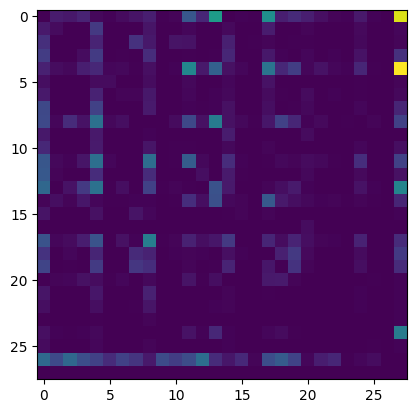

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(N)

In [30]:
#for better visualization inverting stoi
itos={i:s for s,i in stoi.items()}

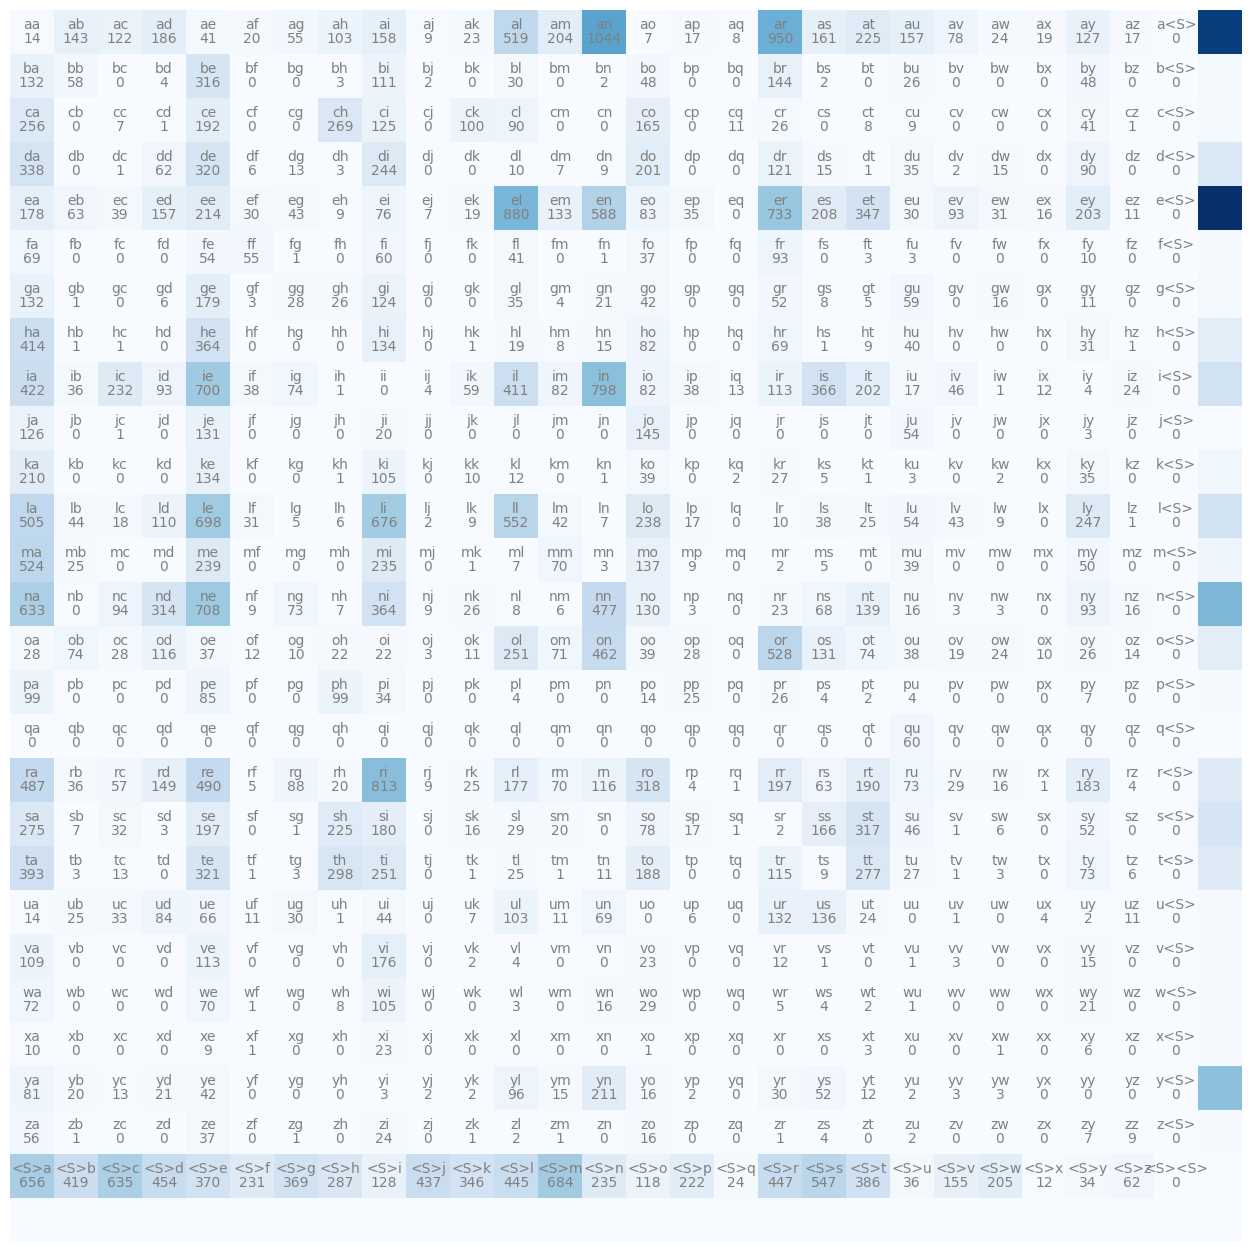

In [31]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

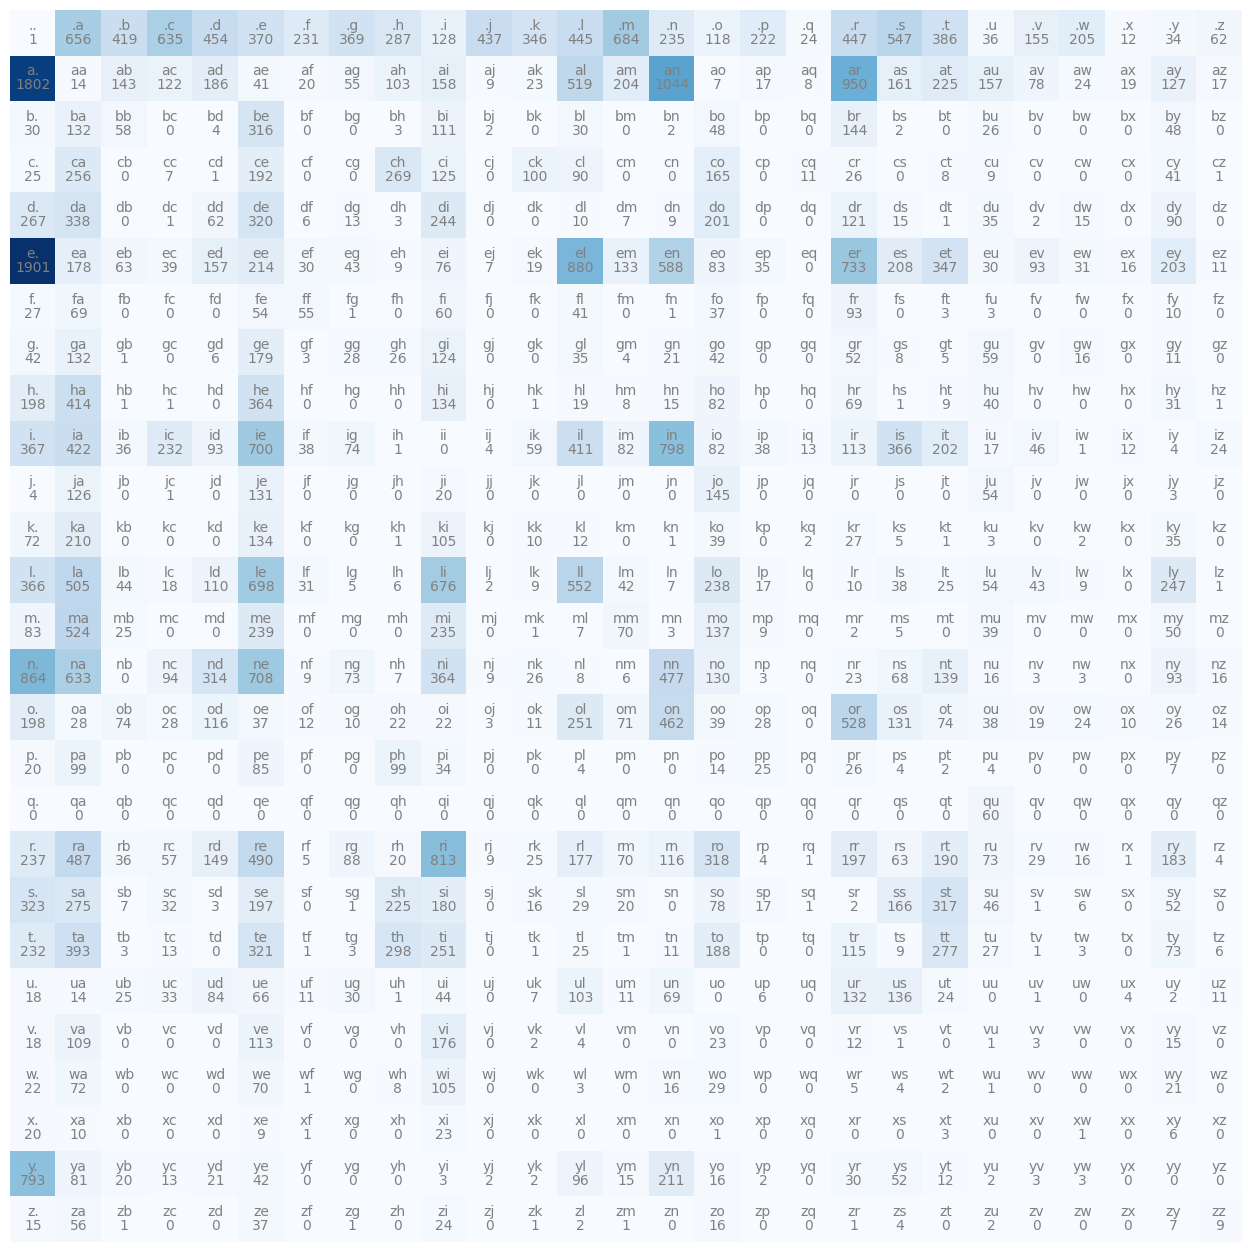

In [32]:
#one entire row and column are empty bcoz <s> cant be second token and <e> cant be a first token .so replacing it with a (.).
# 26 alphabets+ 1 token for  start and ending ->(.)
N=torch.zeros((27,27),dtype=torch.int32)

chars = sorted(list(set(''.join(words))))
stoi ={s:i+1 for i,s in enumerate(chars) }
stoi['.']=0
itos={i:s for s,i in stoi.items()}

for w in words[:]:
    chs=['.']+list(w)+['.']
    
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        
        N[ix1,ix2]+=1

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');


In [112]:
N[0]

tensor([  1, 656, 419, 635, 454, 370, 231, 369, 287, 128, 437, 346, 445, 684,
        235, 118, 222,  24, 447, 547, 386,  36, 155, 205,  12,  34,  62],
       dtype=torch.int32)

In [113]:
#converting counts to probability
p=N[0].float()  # first to float as defined as torch.int 32 ig
p=p/p.sum()
p

tensor([0.0001, 0.0826, 0.0527, 0.0799, 0.0571, 0.0466, 0.0291, 0.0464, 0.0361,
        0.0161, 0.0550, 0.0435, 0.0560, 0.0861, 0.0296, 0.0149, 0.0279, 0.0030,
        0.0563, 0.0688, 0.0486, 0.0045, 0.0195, 0.0258, 0.0015, 0.0043, 0.0078])

In [49]:
p.sum()

tensor(1.)

In [59]:
g = torch.Generator().manual_seed(2147483647)
ix=torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
print(ix,':',itos[ix])



3 : c


In [36]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [40]:
# torch.Generator()	Controls randomness
#  .manual_seed()	Makes sampling reproducible
# torch.multinomial(p,1)	Samples an index based on probabilities
# .item()	Converts tensor → int
# itos[ix]	Converts index → token/character


torch.multinomial(p, num_samples=100, replacement=True, generator=g)

tensor([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
        1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        1, 1, 0, 0])

In [94]:
P.sum(dim=1,keepdim=True)

tensor([[7945.],
        [6233.],
        [ 956.],
        [1326.],
        [1760.],
        [6127.],
        [ 454.],
        [ 794.],
        [1388.],
        [4235.],
        [ 484.],
        [ 659.],
        [3753.],
        [1429.],
        [4086.],
        [2276.],
        [ 423.],
        [  60.],
        [3858.],
        [1994.],
        [2252.],
        [ 832.],
        [ 477.],
        [ 359.],
        [  74.],
        [1419.],
        [ 177.]])

In [72]:
P.shape

torch.Size([27, 27])

In [133]:
a=torch.rand(1,27)
a

tensor([[0.6696, 0.5047, 0.4094, 0.3215, 0.4301, 0.0531, 0.8717, 0.3160, 0.5908,
         0.3731, 0.1202, 0.1309, 0.4830, 0.2445, 0.8116, 0.7834, 0.4071, 0.5877,
         0.8106, 0.6251, 0.4604, 0.4341, 0.6200, 0.8377, 0.8774, 0.1906, 0.3354]])

In [134]:
a[0][4]

tensor(0.4301)

In [136]:
a=torch.rand(27,1)
a

tensor([[0.1126],
        [0.0922],
        [0.0706],
        [0.8881],
        [0.6184],
        [0.0852],
        [0.4738],
        [0.9756],
        [0.0795],
        [0.8529],
        [0.2440],
        [0.1024],
        [0.7269],
        [0.6657],
        [0.7189],
        [0.2512],
        [0.8997],
        [0.2236],
        [0.4441],
        [0.3272],
        [0.3876],
        [0.2255],
        [0.2125],
        [0.7232],
        [0.2165],
        [0.9325],
        [0.5714]])

In [140]:
a[26]

tensor([0.5714])

In [139]:
a[26][0]

tensor(0.5714)

In [98]:
a=P.sum(dim=0)
a


tensor([3.1229, 4.2279, 0.2828, 0.2948, 0.4953, 3.9747, 0.2215, 0.2146, 0.8172,
        3.0874, 0.0684, 0.2045, 1.2159, 0.3256, 1.1645, 1.5805, 0.1465, 0.0195,
        1.5858, 0.6808, 0.7091, 1.4617, 0.0978, 0.1045, 0.0195, 0.7790, 0.0976])

In [99]:
a.shape

torch.Size([27])

In [100]:
a[0]

tensor(3.1229)

In [103]:
a[1]

tensor(4.2279)

In [127]:
P=N.float()

In [121]:
a=P.sum(dim=1,keepdim=True)
a

tensor([[7945.],
        [6233.],
        [ 956.],
        [1326.],
        [1760.],
        [6127.],
        [ 454.],
        [ 794.],
        [1388.],
        [4235.],
        [ 484.],
        [ 659.],
        [3753.],
        [1429.],
        [4086.],
        [2276.],
        [ 423.],
        [  60.],
        [3858.],
        [1994.],
        [2252.],
        [ 832.],
        [ 477.],
        [ 359.],
        [  74.],
        [1419.],
        [ 177.]])

In [122]:
a.shape

torch.Size([27, 1])

In [123]:
a[0]

tensor([7945.])

In [141]:
P=N.float()
P/=P.sum(dim=1,keepdim=True)


In [142]:
P[0].sum()

tensor(1.)

In [143]:
g = torch.Generator().manual_seed(2147483647)

for i in range(20):
    ix=0
    out=[]
    while True:
        #p=N[ix].float()
        #=p/p.sum()
        p=P[ix]
        ix=torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix==0 :
            break
    print(''.join(out))

ce.
be.
comalurarorikarharellimitta.
nelladi.
ka.
da.
stary.
beltthrigotas.
moliellivo.
ke.
teda.
ka.
erda.
sade.
enkavieny.
fobsp.
hinine.
vorrlasuddsord.
le.
gl.


## Loss Function

In [150]:
for w in words[:3]:
    chs=['.']+list(w)+['.']
    
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        prob = P [ix1,ix2]
        
        print(f'{ch1}{ch2} : {prob :.4f}')

.a : 0.0826
aa : 0.0022
am : 0.0327
mi : 0.1645
ir : 0.0267
r. : 0.0614
.a : 0.0826
aa : 0.0022
ar : 0.1524
ro : 0.0824
on : 0.2030
n. : 0.2115
.a : 0.0826
ab : 0.0229
bb : 0.0607
be : 0.3305
ey : 0.0331
y. : 0.5588


In [152]:
1/27.0 #equal probabaility

0.037037037037037035

In [167]:
# as in MLE we need to multiply all prob .prob value will be very small.
# so take log of that as log ranges between around -4 to 0 for input between 0 to 1 

for w in words[:3]:
    chs=['.']+list(w)+['.']
    
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        prob = P [ix1,ix2]
        logprob = torch.log(prob)
        
        
        print(f'{ch1}{ch2} :prob->  {prob :.4f} ,log-> {logprob:.4f}')



.a :prob->  0.0826 ,log-> -2.4941
aa :prob->  0.0022 ,log-> -6.0986
am :prob->  0.0327 ,log-> -3.4195
mi :prob->  0.1645 ,log-> -1.8051
ir :prob->  0.0267 ,log-> -3.6238
r. :prob->  0.0614 ,log-> -2.7898
.a :prob->  0.0826 ,log-> -2.4941
aa :prob->  0.0022 ,log-> -6.0986
ar :prob->  0.1524 ,log-> -1.8812
ro :prob->  0.0824 ,log-> -2.4959
on :prob->  0.2030 ,log-> -1.5946
n. :prob->  0.2115 ,log-> -1.5537
.a :prob->  0.0826 ,log-> -2.4941
ab :prob->  0.0229 ,log-> -3.7748
bb :prob->  0.0607 ,log-> -2.8023
be :prob->  0.3305 ,log-> -1.1070
ey :prob->  0.0331 ,log-> -3.4073
y. :prob->  0.5588 ,log-> -0.5819


In [178]:
# in MLE a*b*c in log it needs addition easy to compute
#to optimize we reduce loss so nll can be used 
#we normalize the nll by count n to get average loss
n=0
log_likelihood=0.0
for w in words[:3]:
    chs=['.']+list(w)+['.']
    
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        prob = P [ix1,ix2]
        logprob = torch.log(prob)
        log_likelihood+=logprob
        nll=-log_likelihood
        n+=1
        print(f'{ch1}{ch2} :prob->  {prob :.4f} ,log-> {logprob:.4f}')
        
print(f'{log_likelihood=}')
print(f'{nll=}')
print(f'{nll/n}')


.a :prob->  0.0826 ,log-> -2.4941
aa :prob->  0.0022 ,log-> -6.0986
am :prob->  0.0327 ,log-> -3.4195
mi :prob->  0.1645 ,log-> -1.8051
ir :prob->  0.0267 ,log-> -3.6238
r. :prob->  0.0614 ,log-> -2.7898
.a :prob->  0.0826 ,log-> -2.4941
aa :prob->  0.0022 ,log-> -6.0986
ar :prob->  0.1524 ,log-> -1.8812
ro :prob->  0.0824 ,log-> -2.4959
on :prob->  0.2030 ,log-> -1.5946
n. :prob->  0.2115 ,log-> -1.5537
.a :prob->  0.0826 ,log-> -2.4941
ab :prob->  0.0229 ,log-> -3.7748
bb :prob->  0.0607 ,log-> -2.8023
be :prob->  0.3305 ,log-> -1.1070
ey :prob->  0.0331 ,log-> -3.4073
y. :prob->  0.5588 ,log-> -0.5819
log_likelihood=tensor(-50.5164)
nll=tensor(50.5164)
2.806464195251465


In [181]:
# for the entire dataset
n=0
log_likelihood=0.0
for w in words:
    chs=['.']+list(w)+['.']
    
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        prob = P [ix1,ix2]
        logprob = torch.log(prob)
        log_likelihood+=logprob
        nll=-log_likelihood
        n+=1
        #print(f'{ch1}{ch2} :prob->  {prob :.4f} ,log-> {logprob:.4f}')
        
print(f'{log_likelihood=}')
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-134003.7031)
nll=tensor(134003.7031)
2.400209665298462


In [192]:
# for a particular word ,here raj
n=0
log_likelihood=0.0
for w in["raj"]:
    chs=['.']+list(w)+['.']
    
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        prob = P [ix1,ix2]
        logprob = torch.log(prob)
        log_likelihood+=logprob
        nll=-log_likelihood
        n+=1
        print(f'{ch1}{ch2} :prob->  {prob :.4f} ,log-> {logprob:.4f}')
        
print(f'{log_likelihood=}')
print(f'{nll=}')
print(f'{nll/n}')


.r :prob->  0.0563 ,log-> -2.8777
ra :prob->  0.1262 ,log-> -2.0696
aj :prob->  0.0014 ,log-> -6.5404
j. :prob->  0.0083 ,log-> -4.7958
log_likelihood=tensor(-16.2836)
nll=tensor(16.2836)
4.070889472961426


In [193]:
n=0
log_likelihood=0.0
for w in["xraj"]:
    chs=['.']+list(w)+['.']
    
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        prob = P [ix1,ix2]
        logprob = torch.log(prob)
        log_likelihood+=logprob
        nll=-log_likelihood
        n+=1
        print(f'{ch1}{ch2} :prob->  {prob :.4f} ,log-> {logprob:.4f}')
        
print(f'{log_likelihood=}')
print(f'{nll=}')
print(f'{nll/n}')

.x :prob->  0.0015 ,log-> -6.4954
xr :prob->  0.0000 ,log-> -inf
ra :prob->  0.1262 ,log-> -2.0696
aj :prob->  0.0014 ,log-> -6.5404
j. :prob->  0.0083 ,log-> -4.7958
log_likelihood=tensor(-inf)
nll=tensor(inf)
inf


In [195]:
# as it gives inf loss for a new instance so we add smoothing (add 1 smoothing)
P=(N+1).float()
P/=P.sum(dim=1,keepdim=True)

n=0
log_likelihood=0.0
for w in words:
    chs=['.']+list(w)+['.']
    
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        prob = P [ix1,ix2]
        logprob = torch.log(prob)
        log_likelihood+=logprob
        nll=-log_likelihood
        n+=1
        #print(f'{ch1}{ch2} :prob->  {prob :.4f} ,log-> {logprob:.4f}')
        
print(f'{log_likelihood=}')
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-134246.9531)
nll=tensor(134246.9531)
2.404566526412964


In [196]:
n=0
log_likelihood=0.0
for w in["xraj"]:
    chs=['.']+list(w)+['.']
    
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        prob = P [ix1,ix2]
        logprob = torch.log(prob)
        log_likelihood+=logprob
        nll=-log_likelihood
        n+=1
        print(f'{ch1}{ch2} :prob->  {prob :.4f} ,log-> {logprob:.4f}')
        
print(f'{log_likelihood=}')
print(f'{nll=}')
print(f'{nll/n}')

.x :prob->  0.0016 ,log-> -6.4187
xr :prob->  0.0099 ,log-> -4.6151
ra :prob->  0.1256 ,log-> -2.0746
aj :prob->  0.0016 ,log-> -6.4394
j. :prob->  0.0098 ,log-> -4.6269
log_likelihood=tensor(-24.1747)
nll=tensor(24.1747)
4.834941387176514


# Using Neural Network Approach

In [212]:
# Creating the training set of Bigrams

xs,ys=[],[]
for w in words[:1]:
    chs=['.']+list(w)+['.']
    
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        print(ch1,ch2)
        xs.append(ix1)
        ys.append(ix2)

xs=torch.tensor(xs)
ys=torch.tensor(ys)
        

. a
a a
a m
m i
i r
r .


In [213]:
xs

tensor([ 0,  1,  1, 13,  9, 18])

In [214]:
ys

tensor([ 1,  1, 13,  9, 18,  0])

In [215]:
#one hot encoding as the nos. ae only keys for chars
import torch.nn.functional as f

In [216]:
xenc=f.one_hot(xs,num_classes=27).float()

In [217]:
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [218]:
xenc.shape

torch.Size([6, 27])

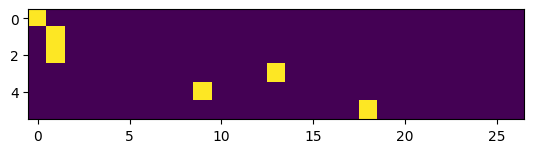

In [219]:
plt.imshow(xenc)

In [220]:
xenc.dtype

torch.float32

In [227]:
W=torch.randn((27,27))

In [228]:
W

tensor([[ 7.0938e-01, -1.2036e+00,  1.5529e-01, -4.3732e-02, -5.7280e-01,
         -3.2957e-01, -3.4977e-01, -1.2213e+00, -3.4471e-03,  3.5858e-01,
         -1.2816e+00,  1.3876e-01,  1.8834e+00,  1.1459e+00,  8.8357e-01,
          6.9075e-01, -3.6567e-01,  9.1840e-01,  1.8393e+00, -4.8912e-01,
         -8.0970e-01, -3.5431e-01, -1.1670e+00,  4.1798e-01,  5.8779e-02,
          8.4984e-01, -7.8637e-01],
        [ 1.7411e-01,  3.9724e-01, -1.8884e+00, -7.3541e-01, -1.4218e+00,
         -4.3364e-01, -7.7899e-03,  4.9870e-01,  7.0776e-02,  8.9865e-01,
          8.6965e-01,  8.3418e-02, -1.3353e+00,  5.2470e-01, -6.5128e-01,
          3.5003e-01,  1.8805e+00,  7.9913e-01,  3.2743e-01,  3.2053e-01,
          9.4757e-01,  1.2032e+00, -1.8586e-01,  1.0218e+00,  8.5904e-01,
          3.9740e-01, -4.4910e-01],
        [-8.4060e-01,  1.5768e-01,  4.4724e-01,  4.5071e-01,  7.6987e-01,
          1.9851e-01,  5.2239e-01, -1.1867e-02,  7.1711e-01,  1.1000e+00,
          1.2148e-01, -6.2877e-01, -1.17

In [229]:
xenc @ W

tensor([[ 0.7094, -1.2036,  0.1553, -0.0437, -0.5728, -0.3296, -0.3498, -1.2213,
         -0.0034,  0.3586, -1.2816,  0.1388,  1.8834,  1.1459,  0.8836,  0.6908,
         -0.3657,  0.9184,  1.8393, -0.4891, -0.8097, -0.3543, -1.1670,  0.4180,
          0.0588,  0.8498, -0.7864],
        [ 0.1741,  0.3972, -1.8884, -0.7354, -1.4218, -0.4336, -0.0078,  0.4987,
          0.0708,  0.8986,  0.8697,  0.0834, -1.3353,  0.5247, -0.6513,  0.3500,
          1.8805,  0.7991,  0.3274,  0.3205,  0.9476,  1.2032, -0.1859,  1.0218,
          0.8590,  0.3974, -0.4491],
        [ 0.1741,  0.3972, -1.8884, -0.7354, -1.4218, -0.4336, -0.0078,  0.4987,
          0.0708,  0.8986,  0.8697,  0.0834, -1.3353,  0.5247, -0.6513,  0.3500,
          1.8805,  0.7991,  0.3274,  0.3205,  0.9476,  1.2032, -0.1859,  1.0218,
          0.8590,  0.3974, -0.4491],
        [-0.6823, -1.6343, -0.5303, -1.4780,  0.5430,  0.2397,  0.5083, -1.0779,
          1.1642, -1.4075, -0.7787, -0.2969,  0.4297, -1.3958,  0.0330, -0.3730

In [231]:
(xenc @ W)[3][13]

tensor(-1.3958)

In [233]:
(xenc[3]*W[:,13]).sum()

tensor(-1.3958)

In [235]:
logits=xenc @ W
counts= logits.exp() #equivalent to n-count table
probs =counts / counts.sum(1,keepdim=True)
probs

tensor([[0.0488, 0.0072, 0.0280, 0.0230, 0.0135, 0.0173, 0.0169, 0.0071, 0.0239,
         0.0344, 0.0067, 0.0276, 0.1578, 0.0755, 0.0581, 0.0479, 0.0166, 0.0601,
         0.1510, 0.0147, 0.0107, 0.0168, 0.0075, 0.0365, 0.0255, 0.0561, 0.0109],
        [0.0275, 0.0344, 0.0035, 0.0111, 0.0056, 0.0150, 0.0229, 0.0380, 0.0248,
         0.0567, 0.0551, 0.0251, 0.0061, 0.0390, 0.0120, 0.0328, 0.1515, 0.0514,
         0.0321, 0.0318, 0.0596, 0.0769, 0.0192, 0.0642, 0.0545, 0.0344, 0.0147],
        [0.0275, 0.0344, 0.0035, 0.0111, 0.0056, 0.0150, 0.0229, 0.0380, 0.0248,
         0.0567, 0.0551, 0.0251, 0.0061, 0.0390, 0.0120, 0.0328, 0.1515, 0.0514,
         0.0321, 0.0318, 0.0596, 0.0769, 0.0192, 0.0642, 0.0545, 0.0344, 0.0147],
        [0.0154, 0.0060, 0.0180, 0.0070, 0.0525, 0.0388, 0.0507, 0.0104, 0.0978,
         0.0075, 0.0140, 0.0227, 0.0469, 0.0076, 0.0315, 0.0210, 0.0200, 0.0225,
         0.0125, 0.3231, 0.0046, 0.0165, 0.0402, 0.0578, 0.0235, 0.0175, 0.0142],
        [0.0190, 0.0540,

In [237]:
probs[0].sum()

tensor(1.)

In [238]:
probs.shape

torch.Size([6, 27])

In [239]:
probs[0]

tensor([0.0488, 0.0072, 0.0280, 0.0230, 0.0135, 0.0173, 0.0169, 0.0071, 0.0239,
        0.0344, 0.0067, 0.0276, 0.1578, 0.0755, 0.0581, 0.0479, 0.0166, 0.0601,
        0.1510, 0.0147, 0.0107, 0.0168, 0.0075, 0.0365, 0.0255, 0.0561, 0.0109])

In [277]:
xs

tensor([ 0,  1,  1, 13,  9, 18])

In [278]:
ys

tensor([ 1,  1, 13,  9, 18,  0])

In [279]:
#initializing 27 weights randomly.
g=torch.Generator().manual_seed(2)
W=torch.randn((27,27),generator=g)

In [280]:
xenc=f.one_hot(xs,num_classes=27).float()
logits=xenc @ W
counts=logits.exp()
probs=counts/ counts.sum(1,keepdims=True)
loss =-probs[torch.arange(6), ys].log().mean()

In [281]:
probs.shape

torch.Size([6, 27])

In [275]:
nlls=torch.zeros(6)
for i in range(6):
      x=xs[i].item()
      y=ys[i].item()
      print('--------')
      print(f'Bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
      print('\n','Input to the neural net:', x)
      print('\n','Output probabilities from the neural net:', '\n',probs[i])
      print('\n','Label (actual next character):', y)
      p = probs[i, y]
      print('\n','Probability assigned by the net to the the correct character:', p.item())
      logp = torch.log(p)
      print('\n','Log likelihood:', logp.item())
      nll = -logp
      print('\n','Negative log likelihood:', nll.item())
      nlls[i] = nll

print('\n','\n','=========')
print('Average Negative Log Likelihood, i.e. Loss =', nlls.mean().item())

--------
Bigram example 1: .a (indexes 0,1)

 Input to the neural net: 0

 Output probabilities from the neural net: 
 tensor([0.0119, 0.0844, 0.0092, 0.0111, 0.0100, 0.1084, 0.0117, 0.0300, 0.0136,
        0.0476, 0.0190, 0.0267, 0.0924, 0.0159, 0.0269, 0.0219, 0.0075, 0.0213,
        0.0144, 0.0571, 0.0348, 0.0321, 0.0979, 0.0818, 0.0536, 0.0205, 0.0384])

 Label (actual next character): 1

 Probability assigned by the net to the the correct character: 0.08435121923685074

 Log likelihood: -2.4727659225463867

 Negative log likelihood: 2.4727659225463867
--------
Bigram example 2: aa (indexes 1,1)

 Input to the neural net: 1

 Output probabilities from the neural net: 
 tensor([0.2652, 0.0193, 0.0512, 0.0229, 0.0966, 0.0078, 0.1043, 0.0127, 0.0127,
        0.0046, 0.0163, 0.0132, 0.0082, 0.0532, 0.0257, 0.0051, 0.0079, 0.0066,
        0.0071, 0.0064, 0.0152, 0.0060, 0.0229, 0.0034, 0.1063, 0.0175, 0.0817])

 Label (actual next character): 1

 Probability assigned by the net to the t

In [283]:
probs[0,1],probs[1,1],probs[2,13],probs[3,9],probs[4,18],probs[5,0]

(tensor(0.0844),
 tensor(0.0193),
 tensor(0.0532),
 tensor(0.0216),
 tensor(0.0201),
 tensor(0.1158))

In [290]:
torch.arange(6)

tensor([0, 1, 2, 3, 4, 5])

In [292]:
-probs[torch.arange(6), ys].log().mean()

tensor(3.2085)

In [324]:

g=torch.Generator().manual_seed(2)
W=torch.randn((27,27),generator=g,requires_grad=True)

In [371]:
#forward pass
xenc=f.one_hot(xs,num_classes=27).float()
logits=xenc @ W
counts=logits.exp()
probs=counts/ counts.sum(1,keepdims=True)
loss =-probs[torch.arange(6), ys].log().mean()

In [372]:
print(loss.item())

3.0597293376922607


In [373]:
#backward pass
W.grad=None
loss.backward()

In [374]:
W.grad

tensor([[ 0.0020, -0.1506,  0.0015,  0.0018,  0.0017,  0.0177,  0.0019,  0.0049,
          0.0023,  0.0078,  0.0032,  0.0044,  0.0151,  0.0026,  0.0045,  0.0036,
          0.0012,  0.0035,  0.0024,  0.0094,  0.0057,  0.0053,  0.0160,  0.0134,
          0.0088,  0.0034,  0.0063],
        [ 0.0836, -0.1591,  0.0172,  0.0078,  0.0320,  0.0026,  0.0345,  0.0043,
          0.0043,  0.0016,  0.0055,  0.0045,  0.0028, -0.1459,  0.0087,  0.0017,
          0.0027,  0.0022,  0.0024,  0.0022,  0.0051,  0.0021,  0.0078,  0.0011,
          0.0351,  0.0059,  0.0272],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000

In [369]:
W.data+= -0.1* W.grad

In [370]:
print(loss.item())

3.076026201248169


In [480]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  55830


In [481]:
(W**2).sum()

tensor(704.5897, grad_fn=<SumBackward0>)

In [482]:
for i in range(10):
# gradient descent
    for k in range(1):
      
      # forward pass
      xenc = f.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
      logits = xenc @ W # predict log-counts
      counts = logits.exp() # counts, equivalent to N
      probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
      loss = -probs[torch.arange(num), ys].log().mean()+ 0.01*(W**2).mean()
      print(i,loss.item())
      
      # backward pass
      W.grad = None # set to zero the gradient
      loss.backward()
      
      # update
      W.data += -50 * W.grad

0 3.7938730716705322
1 3.3785266876220703
2 3.149517774581909
3 3.0104165077209473
4 2.913609266281128
5 2.843459367752075
6 2.7903294563293457
7 2.748415231704712
8 2.7142186164855957
9 2.685603141784668


In [484]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(6):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = f.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

cexzmalegllusarorzktxharellisttta.
nelladkzka.
da.
steripucjwthrigmtop.
mblielltxugkwpteda.
ka.
